# Capstone Proposal - NEISS Dataset Exploration

## Import Libraries

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/Capstone/neiss_2022.csv"
neiss = pd.read_csv(path)

Mounted at /content/drive


In [8]:
import plotly.figure_factory as ff
import time
import plotly.express as px

## Preliminary Data Exploration

In [4]:
# shape of the raw dataset
neiss.shape

(323343, 25)

In [ ]:
# preview the data
neiss.head()

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Hispanic,Body_Part,Diagnosis,Other_Diagnosis,...,Fire_Involvement,Product_1,Product_2,Product_3,Alcohol,Drug,Narrative_1,Stratum,PSU,Weight
0,220100687,1/1/2022,56,1,1,NaN,2,93,57,NaN,...,0,1893,0,0,0,0,56YOM TRIED TO BLOCK THE CAT FROM GETTING OUT ...,S,46,77.9827
1,220100691,1/1/2022,85,1,0,NaN,0,80,57,NaN,...,0,670,1807,0,0,0,"85YOM WENT TO SIT ON HIS RECLINER, HIT HIS ARM...",S,46,77.9827
2,220100695,1/1/2022,78,1,1,NaN,2,32,59,NaN,...,0,1842,676,0,0,0,78YOM SLIPPED AND FELL DOWN 6-7 CARPETED STEPS...,S,46,77.9827
3,220100696,1/1/2022,4,2,1,NaN,2,88,53,NaN,...,0,1394,0,0,0,0,4YOF FELL ON HER *** TOY RESULTING IN A CONTUS...,S,46,77.9827
4,220101170,1/1/2022,2,1,1,NaN,2,76,53,NaN,...,0,1878,0,0,0,0,2YOM HAS CONTUSION TO FOREHEAD. TRIPPED AND FE...,S,97,77.9827


In [ ]:
# data types
print(neiss.dtypes)

CPSC_Case_Number       int64
Treatment_Date        object
Age                    int64
Sex                    int64
Race                   int64
Other_Race            object
Hispanic               int64
Body_Part              int64
Diagnosis              int64
Other_Diagnosis       object
Body_Part_2          float64
Diagnosis_2          float64
Other_Diagnosis_2     object
Disposition            int64
Location               int64
Fire_Involvement       int64
Product_1              int64
Product_2              int64
Product_3              int64
Alcohol                int64
Drug                   int64
Narrative_1           object
Stratum               object
PSU                    int64
Weight               float64
dtype: object


In [ ]:
# get summary stats
neiss.describe(include='all')

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Hispanic,Body_Part,Diagnosis,Other_Diagnosis,...,Fire_Involvement,Product_1,Product_2,Product_3,Alcohol,Drug,Narrative_1,Stratum,PSU,Weight
count,3.233430e+05,323343,323343.000000,323343.000000,323343.000000,12013,323343.000000,323343.000000,323343.000000,61075,...,323343.000000,323343.000000,323343.000000,323343.000000,323343.000000,323343.000000,323343,323343,323343.000000,323343.000000
unique,NaN,365,NaN,NaN,NaN,68,NaN,NaN,NaN,4267,...,NaN,NaN,NaN,NaN,NaN,NaN,322516,5,NaN,NaN
top,NaN,5/22/2022,NaN,NaN,NaN,UNKNOWN,NaN,NaN,NaN,PAIN,...,NaN,NaN,NaN,NaN,NaN,NaN,2 YOF WITH A BEAD IN NOSE. DX FB NOSE,V,NaN,NaN
freq,NaN,1148,NaN,NaN,NaN,7671,NaN,NaN,NaN,26429,...,NaN,NaN,NaN,NaN,NaN,NaN,10,118205,NaN,NaN
mean,2.211937e+08,NaN,47.110440,1.455170,1.065157,NaN,1.257244,64.666187,60.859620,NaN,...,0.011109,2157.594626,307.884828,31.713338,0.018318,0.019796,NaN,NaN,45.423108,39.162834
std,2.096836e+06,NaN,50.534202,0.498248,0.942599,NaN,0.916012,24.016447,6.613404,NaN,...,0.166559,1361.905978,827.715552,273.190511,0.134099,0.139300,NaN,NaN,28.568192,30.257881
min,2.201007e+08,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,41.000000,NaN,...,0.000000,102.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,2.000000,5.834200
25%,2.204483e+08,NaN,13.000000,1.000000,0.000000,NaN,0.000000,36.000000,57.000000,NaN,...,0.000000,1211.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,21.000000,17.222300
50%,2.207397e+08,NaN,32.000000,1.000000,1.000000,NaN,2.000000,75.000000,59.000000,NaN,...,0.000000,1807.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,41.000000,19.248500
75%,2.210364e+08,NaN,66.000000,2.000000,1.000000,NaN,2.000000,82.000000,64.000000,NaN,...,0.000000,3274.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,69.000000,77.982700


In [ ]:
# check missing values
print(neiss.isnull().sum())

CPSC_Case_Number          0
Treatment_Date            0
Age                       0
Sex                       0
Race                      0
Other_Race           311330
Hispanic                  0
Body_Part                 0
Diagnosis                 0
Other_Diagnosis      262268
Body_Part_2          251073
Diagnosis_2          251073
Other_Diagnosis_2    308000
Disposition               0
Location                  0
Fire_Involvement          0
Product_1                 0
Product_2                 0
Product_3                 0
Alcohol                   0
Drug                      0
Narrative_1               0
Stratum                   0
PSU                       0
Weight                    0
dtype: int64


In [ ]:
diag_n = len(pd.unique(neiss['Diagnosis']))
body_n = len(pd.unique(neiss['Body_Part']))

In [ ]:
print("No.of.unique Diagnosis values :", diag_n)
print("No.of.unique Body Part values :", body_n)

No.of.unique Diagnosis values : 30
No.of.unique Body Part values : 26


In [ ]:
# correlation matrix
corr_matrix = neiss.corr()


fig = ff.create_annotated_heatmap(
    z=corr_matrix.values,
    x=list(corr_matrix.columns),
    y=list(corr_matrix.index),
    annotation_text=corr_matrix.round(2).values,
    showscale=True
)

fig.show()

<ipython-input-10-c8ab06b34e2c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = neiss.corr()


In [6]:
#feature drop based on low correlation or unnecessary for project
neiss_feature_drop = neiss.drop(['CPSC_Case_Number','Other_Race', 'Diagnosis','Other_Diagnosis', 'Body_Part_2', 'Diagnosis_2', 'Other_Diagnosis_2', 'PSU', 'Stratum', 'Narrative_1','Treatment_Date'], axis=1)

In [ ]:
corr_matrix_fd = neiss_feature_drop.corr()


fig = ff.create_annotated_heatmap(
    z=corr_matrix_fd.values,
    x=list(corr_matrix_fd.columns),
    y=list(corr_matrix_fd.index),
    annotation_text=corr_matrix_fd.round(2).values,
    showscale=True
)

fig.show()

array([[<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'Race'}>,
        <Axes: title={'center': 'Hispanic'}>],
       [<Axes: title={'center': 'Body_Part'}>,
        <Axes: title={'center': 'Disposition'}>,
        <Axes: title={'center': 'Location'}>,
        <Axes: title={'center': 'Fire_Involvement'}>],
       [<Axes: title={'center': 'Product_1'}>,
        <Axes: title={'center': 'Product_2'}>,
        <Axes: title={'center': 'Product_3'}>,
        <Axes: title={'center': 'Alcohol'}>],
       [<Axes: title={'center': 'Drug'}>,
        <Axes: title={'center': 'Weight'}>, <Axes: >, <Axes: >]],
      dtype=object)

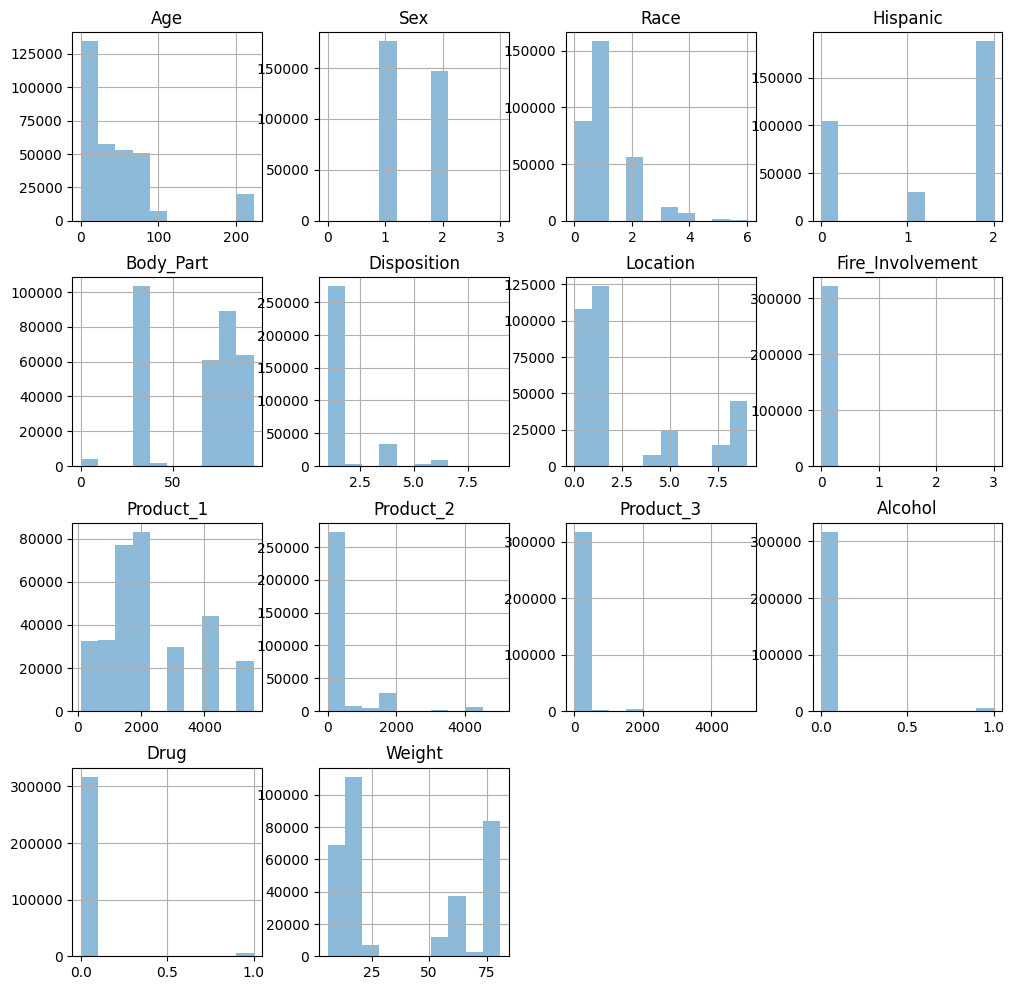

In [7]:
# histogram of features
neiss_feature_drop.hist(alpha=.5, figsize=(12,12))

## Exploratory Data Analysis

In [10]:
import plotly.graph_objects as go

In [11]:
sex_mapping = {
    0: 'Unknown',
    1: 'Male',
    2: 'Female',
    3: 'Non-Binary/Other'
}

In [12]:
neiss['Sex_Mapping'] = neiss['Sex'].map(sex_mapping)

In [13]:
#mapping the month values
months_map = {val: 1 for val in range(201, 224)}
neiss['Age_Adjusted'] = neiss['Age'].apply(lambda x: months_map.get(x, x))

In [14]:
neiss['AgeGroup'] = pd.cut(neiss['Age_Adjusted'], bins=range(0, 111, 10), right=False, labels=range(0, 110, 10))
grouped = neiss.groupby(['AgeGroup', 'Sex_Mapping']).size().unstack()

In [ ]:
print(neiss['AgeGroup'].value_counts(dropna=True).sort_index())

0      80085
10     64240
20     29852
30     25987
40     21466
50     23904
60     26807
70     24657
80     18623
90      7400
100      321
Name: AgeGroup, dtype: int64


In [15]:
colors = {
    'Unknown': 'gray',
    'Male': 'blue',
    'Female': 'pink',
    'Non-Binary/Other': 'green'
}

### Age Distribution by Sex

In [16]:
fig = go.Figure()

for sex, color in colors.items():
    fig.add_trace(go.Bar(name=sex, x=grouped.index, y=grouped[sex], marker_color=color))

# Update the layout
fig.update_layout(barmode='stack', title="Age Distribution by Sex", xaxis_title="Age Group", yaxis_title="Count")
fig.show()

### Body Part Injury by Age Group

In [40]:
neiss['Body_Part_str'] = neiss['Body_Part'].astype(str)

In [41]:
used_body_parts = neiss['Body_Part_str'].unique()
filtered_df = neiss[neiss['Body_Part_str'].isin(used_body_parts)]

In [42]:
fig = px.histogram(data_frame=filtered_df, x='Body_Part_str', color='AgeGroup', barmode='group', title='Body Part Injury by Age Group')
fig.show()

Output hidden; open in https://colab.research.google.com to view.

### Diagnosis by Age Group

In [18]:
fig = px.histogram(data_frame=neiss, x='Diagnosis', color='AgeGroup', barmode='group', title='Body Part Injury by Age Group')
fig.show()

## Classification Models

### Data Split and Dropping Columns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
X_diag = neiss.drop(['CPSC_Case_Number','Other_Race', 'Diagnosis','Other_Diagnosis', 'Body_Part_2', 'Diagnosis_2', 'Other_Diagnosis_2', 'PSU', 'Stratum', 'Sex_Mapping', 'Narrative_1','Treatment_Date', 'AgeGroup'], axis=1)
X_body = neiss.drop(['CPSC_Case_Number','Other_Race', 'Body_Part','Other_Diagnosis', 'Body_Part_2', 'Diagnosis_2', 'Other_Diagnosis_2', 'PSU', 'Stratum', 'Sex_Mapping', 'Narrative_1','Treatment_Date','AgeGroup'], axis=1)
y_diag = neiss['Diagnosis']
y_body = neiss['Body_Part']

In [ ]:
X_diag

In [ ]:
# Splitting data for `body_part`
X_train_body, X_test_body, y_train_body, y_test_body = train_test_split(X_body, y_body, test_size=0.2, random_state=42)

In [ ]:
# Splitting data for `diagnosis`
X_train_diag, X_test_diag, y_train_diag, y_test_diag = train_test_split(X_diag, y_diag, test_size=0.2, random_state=42)

### Logistic Regression

#### Logistic Regression - Body Part

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
logreg_body = LogisticRegression(max_iter=10000)
logreg_body.fit(X_train_body, y_train_body)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=10000)

In [ ]:
lr_predictions_body = logreg_body.predict(X_test_body)

In [ ]:
# Evaluation
print(classification_report(y_test_body, lr_predictions_body))

              precision    recall  f1-score   support

           0       0.38      0.07      0.12       859
          30       0.00      0.00      0.00      2394
          31       0.00      0.00      0.00      3718
          32       0.00      0.00      0.00      1478
          33       0.00      0.00      0.00      2102
          34       0.00      0.00      0.00      2047
          35       0.00      0.00      0.00      3296
          36       0.00      0.00      0.00      2322
          37       0.10      0.01      0.02      3206
          38       0.00      0.00      0.00       375
          75       0.21      0.87      0.34     12280
          76       0.19      0.03      0.06      5704
          77       0.00      0.00      0.00       856
          79       0.21      0.07      0.10      4892
          80       0.00      0.00      0.00       703
          81       0.00      0.00      0.00       816
          82       0.50      0.00      0.00      2559
          83       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Logistic Regression - Diagnosis

In [ ]:
logreg_diag = LogisticRegression(max_iter=10000)
logreg_diag.fit(X_train_diag, y_train_diag)

In [ ]:
lr_predictions_diag = logreg_diag.predict(X_test_diag)

In [ ]:
print(accuracy_score(y_test_diag, lr_predictions_diag))
print(classification_report(y_test_diag, lr_predictions_diag))

### Random Forest

#### RF - Body Part

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Training a Random Forest model for `body_part`
rf_body_part = RandomForestClassifier()
rf_body_part.fit(X_train_body, y_train_body)

RandomForestClassifier()

In [ ]:
# Testing the model
rf_pred_body = rf_body_part.predict(X_test_body)
print(accuracy_score(y_test_body, rf_pred_body))
print(classification_report(y_test_body, rf_pred_body))

0.41180472869535634
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       859
          30       0.18      0.16      0.17      2394
          31       0.19      0.21      0.20      3718
          32       0.24      0.19      0.21      1478
          33       0.19      0.16      0.17      2102
          34       0.16      0.13      0.14      2047
          35       0.17      0.16      0.17      3296
          36       0.13      0.09      0.11      2322
          37       0.32      0.40      0.36      3206
          38       0.10      0.06      0.07       375
          75       0.81      0.85      0.83     12280
          76       0.37      0.48      0.42      5704
          77       0.36      0.31      0.33       856
          79       0.29      0.35      0.32      4892
          80       0.13      0.09      0.11       703
          81       0.09      0.05      0.06       816
          82       0.26      0.21      0.23      2559
       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### RF - Diagnosis

In [ ]:
# Training a Random Forest model for `body_part`
rf_diag = RandomForestClassifier()
rf_diag.fit(X_train_diag, y_train_diag)

RandomForestClassifier()

In [ ]:
rf_pred_diag = rf_diag.predict(X_test_diag)
print(accuracy_score(y_test_diag, rf_pred_diag))
print(classification_report(y_test_diag, rf_pred_diag))

0.5374754519166834
              precision    recall  f1-score   support

          41       0.93      0.99      0.96       794
          42       0.55      0.09      0.16        65
          46       0.00      0.00      0.00        17
          47       0.00      0.00      0.00        22
          48       0.73      0.41      0.52       427
          49       0.50      0.12      0.19        91
          50       0.24      0.09      0.13       142
          51       0.73      0.48      0.58       481
          52       0.40      0.23      0.29      1307
          53       0.30      0.22      0.25      7022
          54       0.11      0.07      0.09       116
          55       0.39      0.24      0.30      1024
          56       0.70      0.55      0.61      1442
          57       0.52      0.58      0.55     10663
          58       0.12      0.03      0.05       896
          59       0.57      0.62      0.60     10174
          60       0.45      0.19      0.26       345
        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### XGBoost Classifier

In [ ]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

#### XGBoost - Body Part

In [ ]:
le = LabelEncoder()
y_train_body_n = le.fit_transform(y_train_body)

In [ ]:
start_time = time.time()
xgb_body_part = xgb.XGBClassifier()
xgb_body_part.fit(X_train_body, y_train_body_n)
print('Fit time : ', time.time() - start_time)

Fit time :  87.65731906890869


In [ ]:
xgb_pred_body = xgb_body_part.predict(X_test_body)
xgb_pred_body = le.inverse_transform(xgb_pred_body)
cm = confusion_matrix(y_test_body, xgb_pred_body)
print(cm)
print(accuracy_score(y_test_body, xgb_pred_body))
print(classification_report(y_test_body, xgb_pred_body))

[[  859     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0]
 [    0   412   318    21    81   169   254    24   249     3    15    88
     14   474    15     4    18    19     0     5    73     0     9   113
     11     5]
 [    0    52  1110    24    21    54   329    22   184    13   176   234
     41   982     9    18    61    50     0    50   155     0     9    62
     36    26]
 [    0    80   102   304   148   103   130    32    87     4    36   127
     15   122    29     5    30    15     0     0    28     0     4    65
     11     1]
 [    0    61   150    70   434   230    84    63    46     5    44   211
     31   112    17    15   146    47     0    12    40     1     5   252
     25     1]
 [    0    76   137    40   203   399   123    25   309     4    14    80
     10   215    16     7    52    33     0     0    24     0    10   248
     20     2]
 [    0   127   324   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### XGBoost(RandomizedSearchCV) - Body Part

In [ ]:
param_dist = {
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 10),
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [ ]:
start_time = time.time()
random_search = RandomizedSearchCV(xgb.XGBClassifier(), param_distributions=param_dist, n_iter=50, cv=5, n_jobs=-1, verbose=2)
random_search.fit(X_train_body, y_train_body_n)
print('Fit time : ', time.time() - start_time)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Fit time :  21575.40693640709


In [ ]:
print(random_search.best_params_)
best_model_random = random_search.best_estimator_
print(best_model_random)

{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 143, 'subsample': 0.8}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=143, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)


In [ ]:
xgbrsc_pred_body = random_search.best_estimator_.predict(X_test_body)
xgbrsc_pred_body = le.inverse_transform(xgbrsc_pred_body)
# Calculate and print the accuracy
test_accuracy = accuracy_score(y_test_body, xgbrsc_pred_body)
print("Test Accuracy: ", test_accuracy)

Test Accuracy:  0.0


XGBoost with Params

In [ ]:
start_time = time.time()
xgb_body_part_params = xgb.XGBClassifier(learning_rate=0.1, colsample_bytree=1, max_depth=8, n_estimators=143, subsample=0.8)
xgb_body_part_params.fit(X_train_body, y_train_body_n)
print('Fit time : ', time.time() - start_time)

Fit time :  174.72220158576965


In [ ]:
xgb_pred_body_params = xgb_body_part_params.predict(X_test_body)
xgb_pred_body_params = le.inverse_transform(xgb_pred_body_params)
cm = confusion_matrix(y_test_body, xgb_pred_body_params)
print(cm)
print(accuracy_score(y_test_body, xgb_pred_body_params))
print(classification_report(y_test_body, xgb_pred_body_params))

[[  859     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0]
 [    0   411   324    20    94   160   259    17   244     3    18    81
     11   492    17     4    17    20     0     2    74     0    10   106
      7     3]
 [    0    47  1123    25    19    59   330    21   183    11   167   230
     40   974    11    13    63    59     0    41   164     1    13    67
     31    26]
 [    0    79   108   314   149    96   115    37    88     4    39   120
     16   120    36     4    24    18     0     3    28     0     3    62
     14     1]
 [    0    61   144    81   447   206    94    57    50     4    53   200
     33   112    19    15   155    40     0    12    41     3     5   245
     23     2]
 [    0    62   143    41   204   410   118    25   304     2    15    76
      7   226    17     6    59    34     0     0    23     1    13   241
     18     2]
 [    0   120   338   

#### XGBoost - Diagnosis

In [ ]:
y_train_diag_n = le.fit_transform(y_train_diag)

In [ ]:
xgb_diag = xgb.XGBClassifier()
xgb_diag.fit(X_train_diag, y_train_diag_n)
print('Fit time : ', time.time() - start_time)

Fit time :  903.1437726020813


In [ ]:
xgb_pred_diag = xgb_diag.predict(X_test_diag)
xgb_pred_diag = le.inverse_transform(xgb_pred_diag)
#cm = confusion_matrix(y_test_diag, xgb_pred_diag)
#print(cm)
print(accuracy_score(y_test_diag, xgb_pred_diag))
print(classification_report(y_test_diag, xgb_pred_diag))

0.5978753343951507
              precision    recall  f1-score   support

          41       0.94      0.98      0.96       794
          42       0.43      0.18      0.26        65
          46       0.60      0.18      0.27        17
          47       0.00      0.00      0.00        22
          48       0.78      0.77      0.77       427
          49       0.50      0.33      0.40        91
          50       0.50      0.16      0.24       142
          51       0.71      0.60      0.65       481
          52       0.51      0.22      0.31      1307
          53       0.40      0.23      0.29      7022
          54       0.28      0.14      0.18       116
          55       0.50      0.25      0.33      1024
          56       0.73      0.69      0.71      1442
          57       0.57      0.68      0.62     10663
          58       0.24      0.02      0.03       896
          59       0.62      0.69      0.66     10174
          60       0.45      0.32      0.38       345
        

#### XGBoost(RandomizedSearchCV) - Diagnosis

### Boosting (XGBoost + AdaBoost)

#### Boosting - Body Part

#### Boosting - Diagnosis

### Naïve Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

#### Naïve Bayes - Body Part

In [ ]:
nb_model = GaussianNB()

#### Naïve Bayes - Diagnosis

### Support Vector Machines (SVM)

In [ ]:
from sklearn.svm import SVC

#### SVM - Body Part

In [ ]:
svm_model = SVC()
svm_model.fit(X_train_body, y_train_body)

SVC()

In [ ]:
svm_predictions_body = svm_model.predict(X_test_body)

In [ ]:
print(accuracy_score(y_test_body, svm_predictions_body))
print(classification_report(y_test_body, svm_predictions_body))

0.1970959810728479
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       859
          30       0.00      0.00      0.00      2394
          31       0.00      0.00      0.00      3718
          32       0.00      0.00      0.00      1478
          33       0.00      0.00      0.00      2102
          34       0.00      0.00      0.00      2047
          35       0.00      0.00      0.00      3296
          36       0.00      0.00      0.00      2322
          37       0.00      0.00      0.00      3206
          38       0.00      0.00      0.00       375
          75       0.20      0.92      0.32     12280
          76       0.00      0.00      0.00      5704
          77       0.00      0.00      0.00       856
          79       0.00      0.00      0.00      4892
          80       0.00      0.00      0.00       703
          81       0.00      0.00      0.00       816
          82       0.00      0.00      0.00      2559
        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### SVM - Diagnosis

In [ ]:
from joblib import dump
dump(random_search, '/content/drive/MyDrive/Capstone/neiss_data_random_search.pkl')

['/content/drive/MyDrive/Capstone/neiss_data_random_search.pkl']

In [ ]:
from joblib import load

In [ ]:
random_search_model = load('/content/drive/MyDrive/Capstone/neiss_data_random_search.pkl')

In [ ]:
print(random_search_model.best_params_)
best_model_random = random_search_model.best_estimator_
print(best_model_random)

{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 143, 'subsample': 0.8}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=143, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)


In [ ]:
xgbrsc_pred_body = random_search_model.best_estimator_.predict(X_test_body)
xgbrsc_pred_body = le.inverse_transform(xgbrsc_pred_body)
# Calculate and print the accuracy
test_accuracy = accuracy_score(y_test_body, xgbrsc_pred_body)
print("Test Accuracy: ", test_accuracy)

Test Accuracy:  0.0
